In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('eurusd_hour.csv')
df.head()

print(df)

             Date   Time       BO       BH       BL       BC      BCh  \
0      2005-05-02  00:00  1.28520  1.28520  1.28400  1.28440 -0.00080   
1      2005-05-02  01:00  1.28440  1.28480  1.28390  1.28420 -0.00020   
2      2005-05-02  02:00  1.28430  1.28540  1.28410  1.28510  0.00080   
3      2005-05-02  03:00  1.28510  1.28590  1.28500  1.28510  0.00000   
4      2005-05-02  04:00  1.28520  1.28590  1.28490  1.28550  0.00030   
...           ...    ...      ...      ...      ...      ...      ...   
93079  2020-04-29  18:00  1.08620  1.08851  1.08611  1.08713  0.00093   
93080  2020-04-29  19:00  1.08711  1.08823  1.08659  1.08748  0.00037   
93081  2020-04-29  20:00  1.08747  1.08788  1.08691  1.08708 -0.00039   
93082  2020-04-29  21:00  1.08708  1.08740  1.08699  1.08714  0.00006   
93083  2020-04-29  22:00  1.08728  1.08760  1.08727  1.08743  0.00015   

            AO       AH       AL       AC      ACh  
0      1.28540  1.28540  1.28420  1.28460 -0.00080  
1      1.28460  1

In [2]:
df.rename(columns={
    'BO': 'Opening bid price',
    'BH': 'Highest bid price',
    'BL': 'Lowest bid price',
    'BC': 'Closing bid price',
    'BCh': 'Change between bid open and close price',
    'AO': 'Opening ask price',
    'AH': 'Highest ask price',
    'AL': 'Lowest ask price',
    'AC': 'Closing ask price',
    'ACh': 'Change between ask open and close price'
}, inplace=True)

# Display the first few rows to check the changes
print(df)

             Date   Time  Opening bid price  Highest bid price  \
0      2005-05-02  00:00            1.28520            1.28520   
1      2005-05-02  01:00            1.28440            1.28480   
2      2005-05-02  02:00            1.28430            1.28540   
3      2005-05-02  03:00            1.28510            1.28590   
4      2005-05-02  04:00            1.28520            1.28590   
...           ...    ...                ...                ...   
93079  2020-04-29  18:00            1.08620            1.08851   
93080  2020-04-29  19:00            1.08711            1.08823   
93081  2020-04-29  20:00            1.08747            1.08788   
93082  2020-04-29  21:00            1.08708            1.08740   
93083  2020-04-29  22:00            1.08728            1.08760   

       Lowest bid price  Closing bid price  \
0               1.28400            1.28440   
1               1.28390            1.28420   
2               1.28410            1.28510   
3               1.28500

In [3]:
print(df)

             Date   Time  Opening bid price  Highest bid price  \
0      2005-05-02  00:00            1.28520            1.28520   
1      2005-05-02  01:00            1.28440            1.28480   
2      2005-05-02  02:00            1.28430            1.28540   
3      2005-05-02  03:00            1.28510            1.28590   
4      2005-05-02  04:00            1.28520            1.28590   
...           ...    ...                ...                ...   
93079  2020-04-29  18:00            1.08620            1.08851   
93080  2020-04-29  19:00            1.08711            1.08823   
93081  2020-04-29  20:00            1.08747            1.08788   
93082  2020-04-29  21:00            1.08708            1.08740   
93083  2020-04-29  22:00            1.08728            1.08760   

       Lowest bid price  Closing bid price  \
0               1.28400            1.28440   
1               1.28390            1.28420   
2               1.28410            1.28510   
3               1.28500

In [4]:
filtered_df = df[df['Date'] == '2005-05-02']
print(filtered_df)
filtered_df['Time_in_seconds'] = pd.to_datetime(filtered_df['Time']).dt.hour * 3600 + \
                                 pd.to_datetime(filtered_df['Time']).dt.minute * 60 + \
                                 pd.to_datetime(filtered_df['Time']).dt.second

          Date   Time  Opening bid price  Highest bid price  Lowest bid price  \
0   2005-05-02  00:00            1.28520            1.28520           1.28400   
1   2005-05-02  01:00            1.28440            1.28480           1.28390   
2   2005-05-02  02:00            1.28430            1.28540           1.28410   
3   2005-05-02  03:00            1.28510            1.28590           1.28500   
4   2005-05-02  04:00            1.28520            1.28590           1.28490   
5   2005-05-02  05:00            1.28540            1.28580           1.28530   
6   2005-05-02  06:00            1.28540            1.28600           1.28520   
7   2005-05-02  07:00            1.28585            1.28605           1.28515   
8   2005-05-02  08:00            1.28555            1.28675           1.28555   
9   2005-05-02  09:00            1.28640            1.28680           1.28620   
10  2005-05-02  10:00            1.28670            1.28740           1.28650   
11  2005-05-02  11:00       

C:\Users\faris\AppData\Local\Temp\ipykernel_28280\2492657730.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['Time_in_seconds'] = pd.to_datetime(filtered_df['Time']).dt.hour * 3600 + \
C:\Users\faris\AppData\Local\Temp\ipykernel_28280\2492657730.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(filtered_df['Time']).dt.minute * 60 + \
C:\Users\faris\AppData\Local\Temp\ipykernel_28280\2492657730.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(filtered_df['Time']).dt.second
C:\Users\faris\AppData\Local\Temp\ipykernel_28280\24

In [5]:
x = filtered_df[['Time_in_seconds']]
y = filtered_df[['Opening bid price']]

In [6]:
model = LinearRegression()

model.fit(x,y)

LinearRegression()

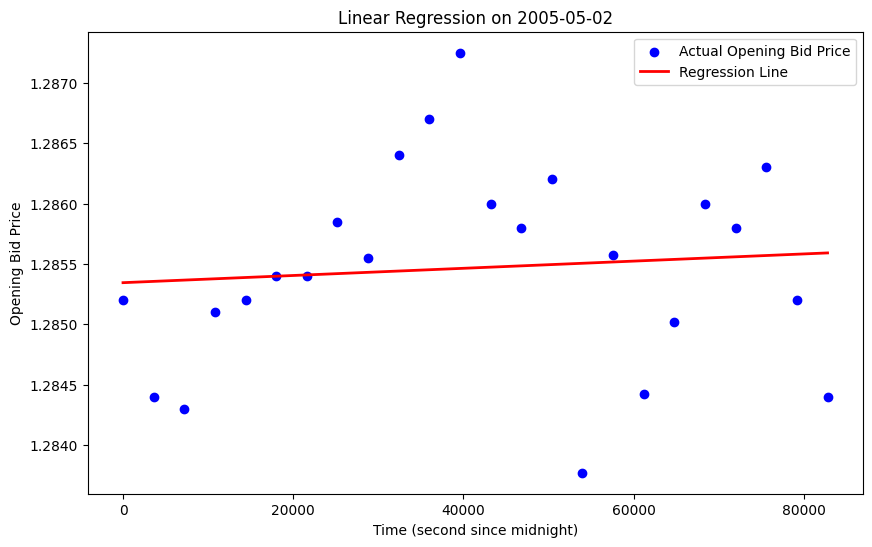

In [7]:
y_predict = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Opening Bid Price')
plt.plot(x, y_predict, color = 'red', linewidth = 2, label = 'Regression Line')
plt.xlabel('Time (second since midnight)')
plt.ylabel('Opening Bid Price')
plt.title('Linear Regression on 2005-05-02')
plt.legend()
plt.show()


In [11]:
filter_df = df
filter_df['Time_in_seconds'] = pd.to_datetime(df['Time']).dt.hour * 3600 + \
                                 pd.to_datetime(df['Time']).dt.minute * 60 + \
                                 pd.to_datetime(df['Time']).dt.second
            
print(df)
# test git

             Date   Time  Opening bid price  Highest bid price  \
0      2005-05-02  00:00            1.28520            1.28520   
1      2005-05-02  01:00            1.28440            1.28480   
2      2005-05-02  02:00            1.28430            1.28540   
3      2005-05-02  03:00            1.28510            1.28590   
4      2005-05-02  04:00            1.28520            1.28590   
...           ...    ...                ...                ...   
93079  2020-04-29  18:00            1.08620            1.08851   
93080  2020-04-29  19:00            1.08711            1.08823   
93081  2020-04-29  20:00            1.08747            1.08788   
93082  2020-04-29  21:00            1.08708            1.08740   
93083  2020-04-29  22:00            1.08728            1.08760   

       Lowest bid price  Closing bid price  \
0               1.28400            1.28440   
1               1.28390            1.28420   
2               1.28410            1.28510   
3               1.28500

C:\Users\faris\AppData\Local\Temp\ipykernel_28280\787621450.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filter_df['Time_in_seconds'] = pd.to_datetime(df['Time']).dt.hour * 3600 + \
C:\Users\faris\AppData\Local\Temp\ipykernel_28280\787621450.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['Time']).dt.minute * 60 + \
C:\Users\faris\AppData\Local\Temp\ipykernel_28280\787621450.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['Time']).dt.second


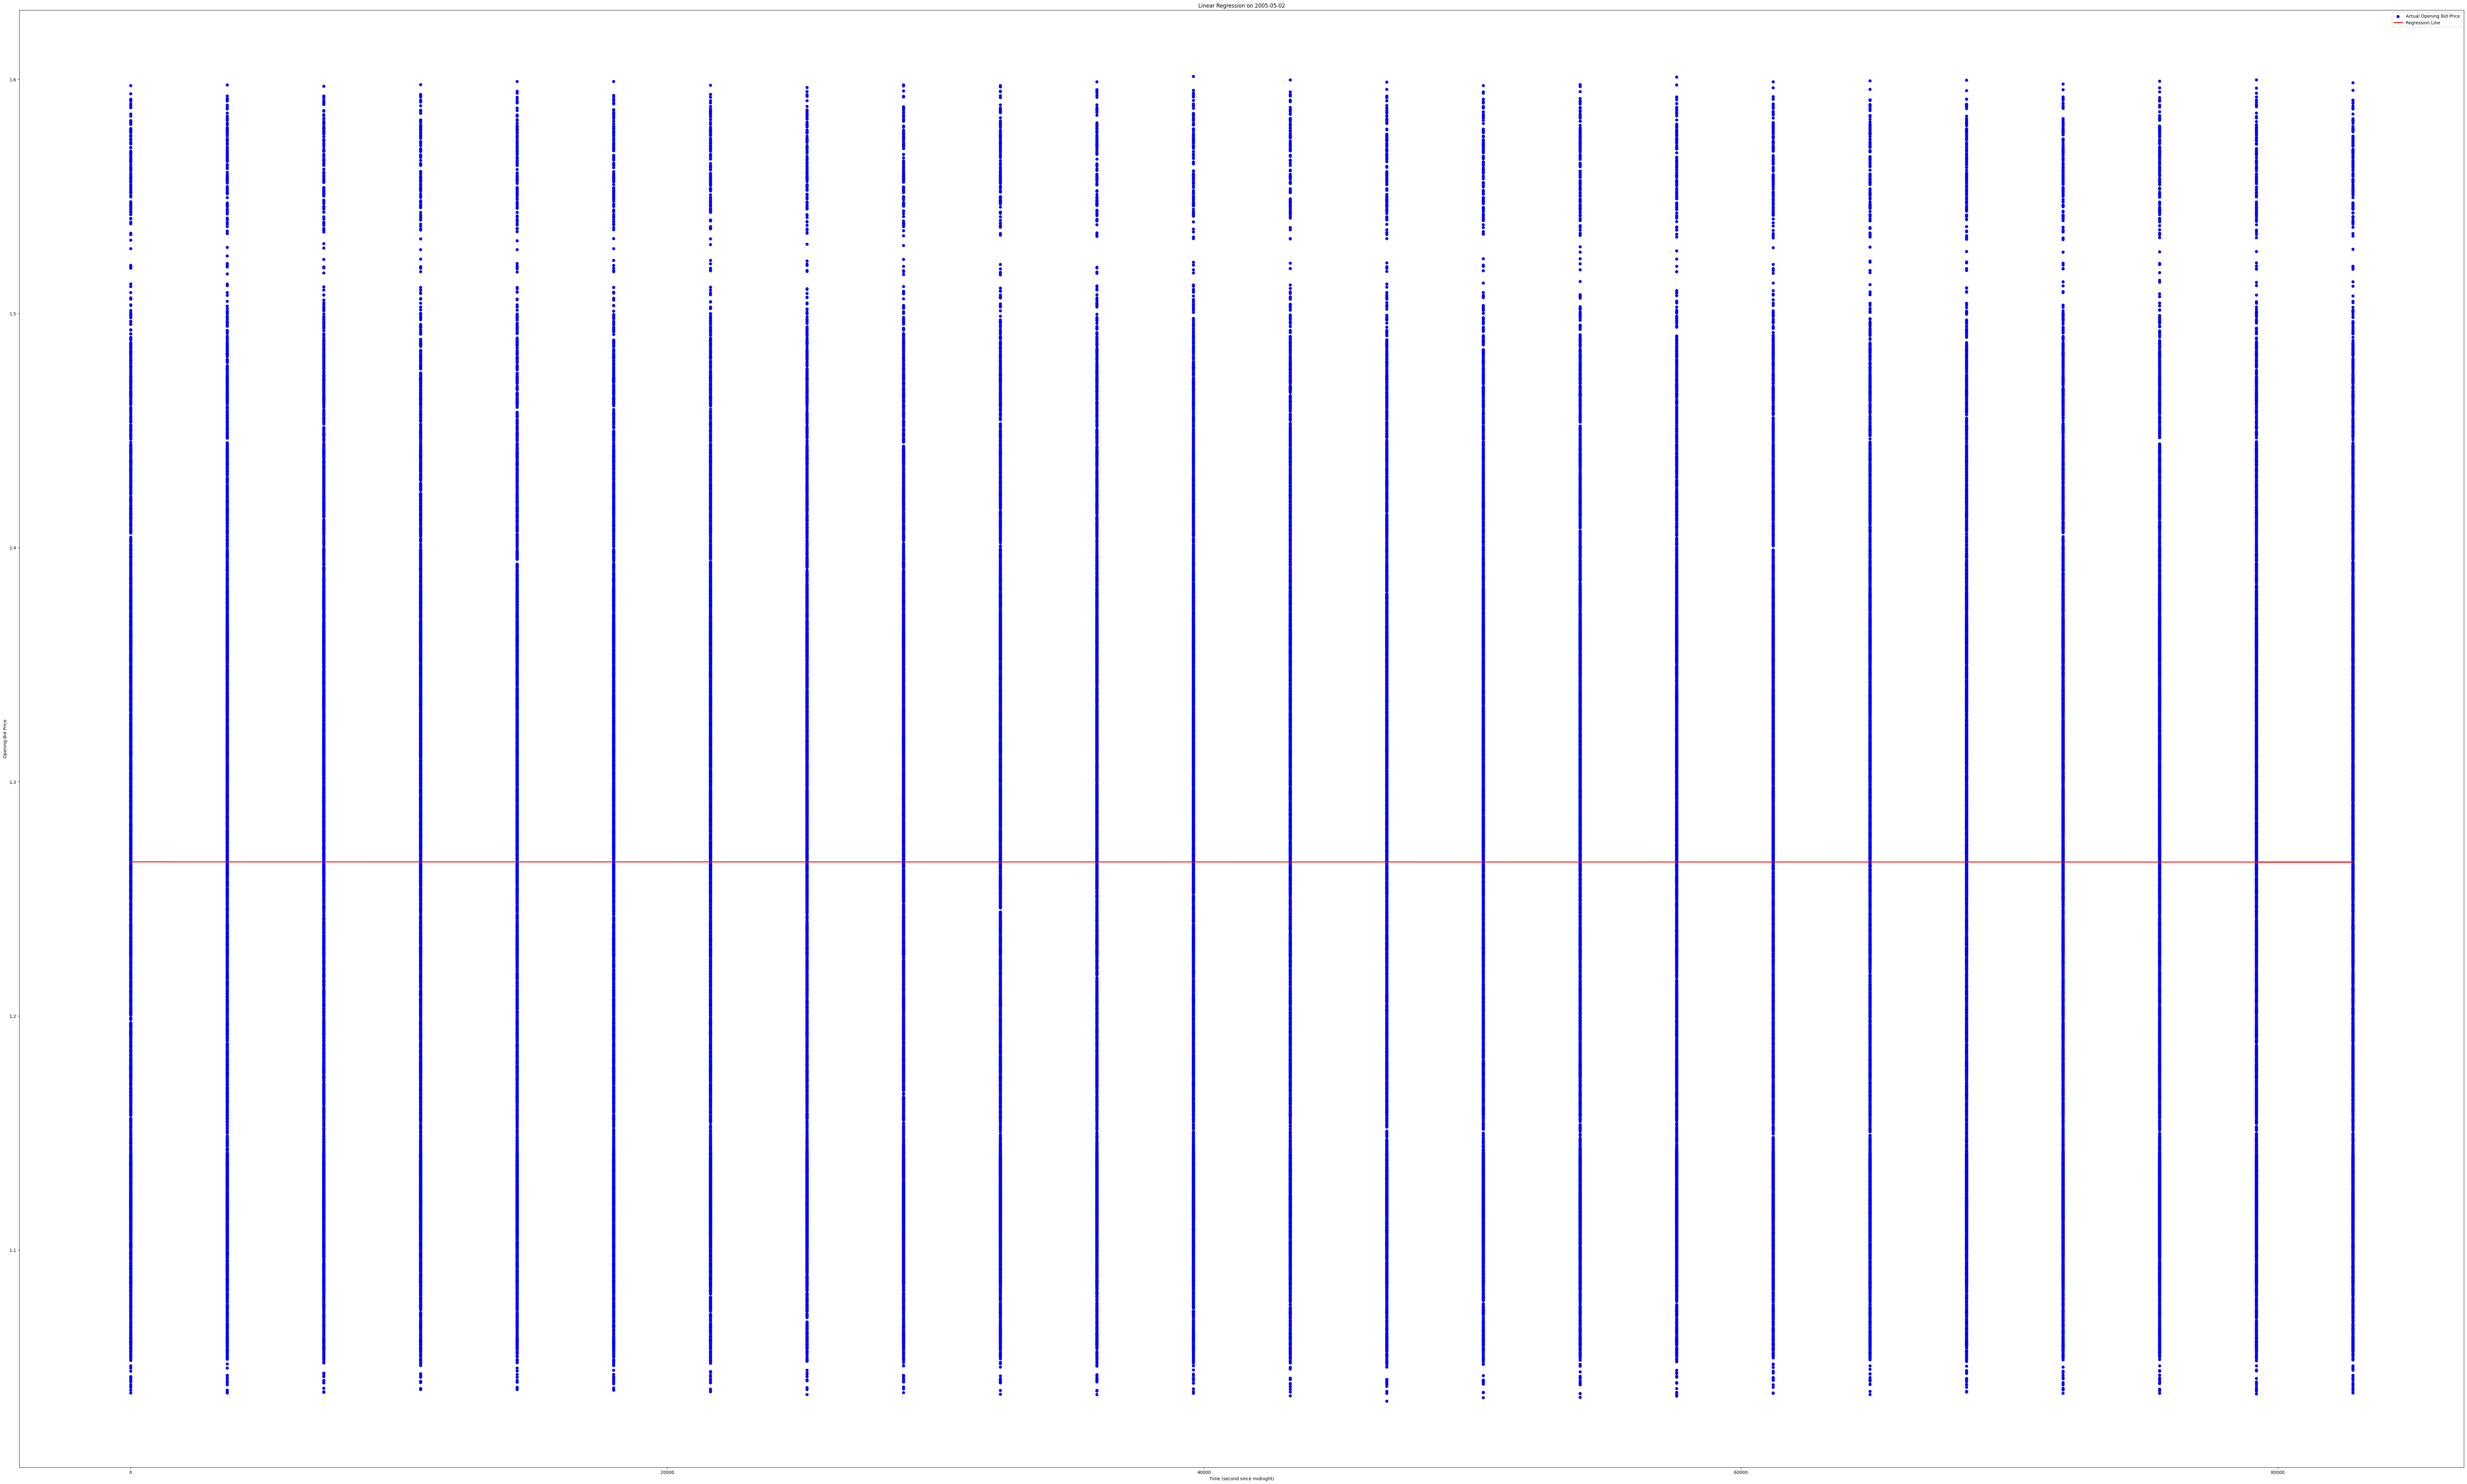

In [13]:
X = filter_df[['Time_in_seconds']]
y = filter_df[['Opening bid price']]

model = LinearRegression()

model.fit(X,y)

y_predict = model.predict(X)

plt.figure(figsize=(100, 60))
plt.scatter(X, y, color='blue', label='Actual Opening Bid Price')
plt.plot(X, y_predict, color = 'red', linewidth = 2, label = 'Regression Line')
plt.xlabel('Time (second since midnight)')
plt.ylabel('Opening Bid Price')
plt.title('Linear Regression on 2005-05-02')
plt.legend()
plt.show()
